In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [23]:
import urllib.request

geojson_url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ZAF_1.json"
geojson_filename = "sa_provinces.geojson"
urllib.request.urlretrieve(geojson_url, geojson_filename)

('sa_provinces.geojson', <http.client.HTTPMessage at 0x7d5c49106a50>)

In [25]:
resources = pd.read_csv('bengwenyama_resources.csv')
sites = pd.read_csv('za_pgm_projects.csv')

In [24]:
provinces = gpd.read_file('sa_provinces.geojson')

In [26]:
beng_row = sites[sites['Site'].str.lower() == 'bengwenyama'].iloc[0]
target_province = beng_row['Province']
beng_lat, beng_lon = beng_row['Latitude'], beng_row['Longitude']

/tmp/ipython-input-27-3024779257.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left')


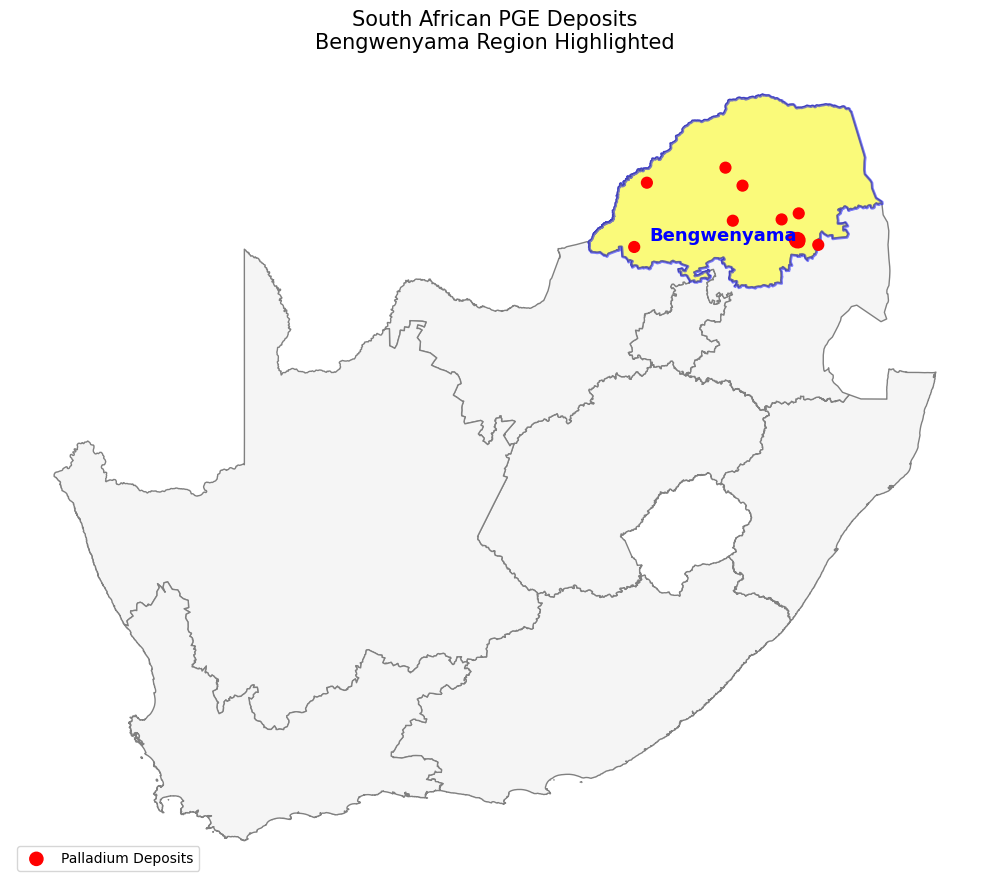

In [27]:
fig, ax = plt.subplots(figsize=(10, 12))

provinces.plot(ax=ax, color='whitesmoke', edgecolor='gray')

provinces[provinces['NAME_1'].str.lower() == target_province.lower()].plot(
    ax=ax, color='yellow', edgecolor='blue', linewidth=2, alpha=0.5, label=f'{target_province} (target)'
)


sites_gdf = gpd.GeoDataFrame(
    sites,
    geometry=gpd.points_from_xy(sites['Longitude'], sites['Latitude']),
    crs='EPSG:4326'
)
colors = ['red' if s.lower() == 'bengwenyama' else 'red' for s in sites['Site']]
sizes = [120 if s.lower() == 'bengwenyama' else 60 for s in sites['Site']]

sites_gdf.plot(ax=ax, color=colors, markersize=sizes, label='Palladium Deposits')
ax.text(beng_lon, beng_lat, 'Bengwenyama', color='blue', fontsize=13, fontweight='bold', ha='right')

ax.set_title('South African PGE Deposits\nBengwenyama Region Highlighted', fontsize=15)
ax.set_axis_off()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [28]:
print("\n--- Bengwenyama Resource Profile ---\n")
display(resources)

resources['Pd_Moz'] = (resources['Pd_Share'] / 100) * resources['4E_Moz']
total_pd_moz = resources['Pd_Moz'].sum()
print(f"\nEstimated total contained Palladium at Bengwenyama: {total_pd_moz:.2f} Moz")

summary_by_reef = resources.groupby('Reef').agg(
    Tonnes_Mt=('Tonnes_Mt', 'sum'),
    Pd_Moz=('Pd_Moz', 'sum'),
    Avg_Depth=('Depth_m', 'mean')
)
print("\nContained palladium by reef:")
display(summary_by_reef)


--- Bengwenyama Resource Profile ---



,ResourceID,Project,Location,Reef,Category,Tonnes_Mt,Grade_4E_gpt,Grade_7E_gpt,4E_Moz,7E_Moz,Pd_Share,Depth_m,Status,Year,Area
0,1,Bengwenyama,Limpopo,UG2,Measured,7.17,8.34,10.00,1.92,2.30,44.7,300,M&I,2024,Central Block
1,2,Bengwenyama,Limpopo,UG2+MR,Indicated,40.11,5.04,6.15,6.60,7.77,44.7,400,M&I,2024,Southern Block
2,3,Bengwenyama,Limpopo,UG2+MR,Inferred,102.14,4.10,4.93,13.65,18.90,44.0,450,Inferred,2024,SE Extension
3,4,Bengwenyama,Limpopo,Merensky,Indicated,15.73,2.97,3.28,1.50,1.66,41.5,340,M&I,2024,Central Block
4,5,Bengwenyama,Limpopo,UG2,Probable Reserves,10.17,6.17,7.48,2.02,2.44,43.7,310,Reserve,2025,Central Block
5,6,Bengwenyama,Limpopo,UG2,Proven Reserves,5.03,7.23,8.56,1.14,1.38,45.3,295,Reserve,2025,Southern Block
6,7,Bengwenyama,Limpopo,UG2,Inferred,10.00,4.15,5.05,1.34,1.62,44.9,490,Resource,2024,NW Extension



Estimated total contained Palladium at Bengwenyama: 12.44 Moz

Contained palladium by reef:


,Tonnes_Mt,Pd_Moz,Avg_Depth
Reef,,,
Merensky,15.73,0.62250,340.00
UG2,32.37,2.85906,348.75
UG2+MR,142.25,8.95620,425.00
